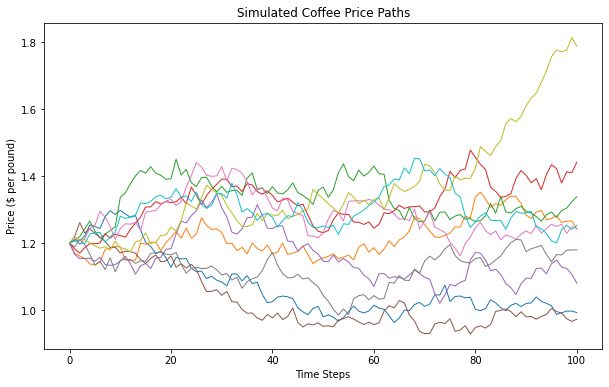

Estimated Call Option Price: $0.0685


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
S0 = 1.20          # Current spot price ($ per pound)
X = 1.25           # Strike price ($ per pound)
r = 0.02           # Risk-free rate (2% per annum)
T = 0.5            # Time to maturity (6 months, or 0.5 years)
sigma = 0.25       # Volatility (25% per annum)
n_simulations = 100000  # Number of Monte Carlo simulations
n_steps = 100      # Number of time steps for each path

# Monte Carlo simulation for price paths visualization
np.random.seed(42)  # For reproducibility
dt = T / n_steps    # Time increment
price_paths = []

for _ in range(10):  # Generate 10 sample paths for visualization
    path = [S0]
    for _ in range(n_steps):
        Z = np.random.normal()  # Random variable from normal distribution
        St = path[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        path.append(St)
    price_paths.append(path)

# Plot the price paths
plt.figure(figsize=(10, 6))
for path in price_paths:
    plt.plot(path, lw=1)
plt.title("Simulated Coffee Price Paths")
plt.xlabel("Time Steps")
plt.ylabel("Price ($ per pound)")
plt.show()

# Monte Carlo simulation for option pricing
payoffs = []

for _ in range(n_simulations):
    Z = np.random.normal()  # Single-step Z for maturity price
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoff = max(ST - X, 0)  # Call option payoff
    payoffs.append(payoff)

# Calculate the option price
call_price = np.exp(-r * T) * np.mean(payoffs)
print(f"Estimated Call Option Price: ${call_price:.4f}")
